In [82]:
#importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime 

In [84]:
#Reading the excel file 
youtube_data = pd.read_csv('Youtube Influencer Analysis - Updated.csv', encoding = 'latin')

In [85]:
youtube_data

,Video Link,Video Views,Video Title,Channel URL,Creator Name,Creator Gender,Total Channel Subcribers,Total Chanel Views,Duration of Video,Duration in Seconds,Date of Video Upload,No of Likes,Language of the Video,Subtitle,Video Description,Hashtags,No of Comments,Date of the Last Comment,Maximum Quality of the Video,No of Videos the Channel,No of Playlist,Premiered or Not,Community Engagement (Posts per week),Intern Who Collected the Data
0,https://www.youtube.com/watch?v=_0fUOJ55gis,"146,059",Samse - Didupe Off-road Royal Enfield Himalayan,https://www.youtube.com/c/sriharick,srihari ck,Male,40200,7964284,00:30:41,"1,841.00",7/29/2022,6700.0,Kannada,No,Yes,0,419,8/6/2022,1080,462,12.0,No,1,Akhil Teja
1,https://www.youtube.com/watch?v=_70MSLPRfZI,"231,969",Bhoom Baddhal Web Series,https://www.youtube.com/c/ChaibisketTelugu,Chai Bisket,Male,920000,137535681,00:14:24,864.00,5/22/2022,7800.0,Telugu,No,Yes,1,189,6/15/2022,1080,251,12.0,Yes,2,Akhil Teja
2,https://www.youtube.com/watch?v=_8gfCdt3H00&t=87s,878,"Customer Psychology, Four Views Of Consumer De...",https://www.youtube.com/channel/UCcIUnCsBfONvb...,Virda Warsi,Female,458,72945,0:08:12,492.00,2/9/2021,858.0,Hindi,No,Yes,0,0,NaN,720,158,0.0,No,0,Syed safdar
3,https://www.youtube.com/watch?v=_CkFNJgKsFs,"9,965",Top countries with proven natural gas reserves,https://www.youtube.com/c/trtworld,TRT,NaN,1680000,541653219,0:01:06,66.00,9/13/2022,188.0,English,No,Yes,0,77,9/22/2022,1080,46509,48.0,No,20,Syed safdar
4,https://www.youtube.com/watch?v=_GFkHA5EZdE,"39,780,561",73 Questions With Selena Gomez,Vogue - YouTube,Vogue,NaN,12100000,3600496171,0:07:40,460.00,3/21/2017,901000.0,English,yes,Yes,0,28221,9/23/2022,1080,2872,113.0,No,1,Rahul Singh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,https://www.youtube.com/watch?v=GS18WawA-t0,"6,892",Calming mashup of Islamic Nasheed 2022 | Isami...,https://www.youtube.com/c/SahilOnlineTVnews,Sahil Online TV News,NaN,594000,129926690,00:13:47,827.00,9/29/2022,235.0,Urdu + Arabic,No,Yes,0,15,10/4/2022,1080,5024,36.0,No,1,Mafaz Ali
901,https://www.youtube.com/watch?v=_tc_APkjH2Q,"16,554",Amchi Nawayat Mehfil hee,https://www.youtube.com/sahilonline,Sahil Online TV News,NaN,594000,129926690,00:06:44,404.00,8/6/2017,117.0,Nawayathi,No,Yes,2,0,10/4/2022,720,5024,36.0,No,1,Mafaz Ali
902,https://www.youtube.com/watch?v=Xfj4osSYfhU,"32,798",Aas ge Kaagaz,https://www.youtube.com/sahilonline,Sahil Online Bhatkal,NaN,23500,5104872,00:06:24,384.00,1/3/2021,1.0,Nawayathi,No,Yes,3,0,8/4/2022,720,1018,13.0,No,1,Mafaz Ali
903,https://www.youtube.com/watch?v=mGEHqwVz0eI,"1,503",Anjuman Tarana by ABHS Students | Anjuman Anju...,https://www.youtube.com/sahilonline,Sahil Online Bhatkal,NaN,23500,5104872,00:04:39,279.00,3/6/2022,1.0,Urdu,No,Yes,3,0,8/4/2022,1080,1018,13.0,No,1,Mafaz Ali


# Preprocessing Data
Checking the content of the data and its columns names and its datatypes. We will check we there are any null values, duplicate rows and missing values and impute those values and change the datatypes of the columns as needed.

In [5]:
print(youtube_data.shape) #Shape of the dataset

(905, 24)


In [6]:
youtube_data.columns

Index(['Video Link', 'Video Views', 'Video Title', 'Channel URL',
       'Creator Name', 'Creator Gender', 'Total Channel Subcribers',
       'Total Chanel Views', 'Duration of Video', 'Duration in Seconds',
       'Date of Video Upload', 'No of Likes', 'Language of the Video',
       'Subtitle', 'Video Description', 'Hashtags', 'No of Comments',
       'Date of the Last Comment', 'Maximum Quality of the Video',
       'No of Videos the Channel', 'No of Playlist', 'Premiered or Not',
       'Community Engagement (Posts per week)',
       'Intern Who Collected the Data'],
      dtype='object')

In [7]:
youtube_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Video Link                             905 non-null    object 
 1   Video Views                            905 non-null    object 
 2   Video Title                            905 non-null    object 
 3   Channel URL                            905 non-null    object 
 4   Creator Name                           894 non-null    object 
 5   Creator Gender                         591 non-null    object 
 6   Total Channel Subcribers               905 non-null    object 
 7   Total Chanel Views                     905 non-null    object 
 8   Duration of Video                      905 non-null    object 
 9   Duration in Seconds                    905 non-null    object 
 10  Date of Video Upload                   905 non-null    object 
 11  No of 

In [8]:
youtube_data.describe()

,No of Likes,Hashtags,Maximum Quality of the Video,No of Videos the Channel,No of Playlist,Community Engagement (Posts per week)
count,9.040000e+02,905.000000,905.000000,905.000000,896.000000,905.000000
mean,5.840101e+05,1.030939,1227.712707,4962.866298,82.246652,4.516022
std,2.959309e+06,1.835350,419.254719,24193.140397,446.041267,19.377195
min,0.000000e+00,0.000000,240.000000,1.000000,0.000000,0.000000
25%,5.475000e+03,0.000000,1080.000000,150.000000,6.000000,0.000000
50%,3.250000e+04,0.000000,1080.000000,389.000000,16.000000,1.000000
75%,1.845000e+05,2.000000,1080.000000,1393.000000,47.250000,3.000000
max,4.900000e+07,28.000000,2160.000000,420000.000000,6000.000000,341.000000


# Changing Column Names
The column name has whitespaces and Capital Letters in the middle. These may cause some unwanted errors when typing the code, so lower casing the characters and replace the whitespaces with underscore

In [9]:
youtube_data.columns = youtube_data.columns.str.lower()
youtube_data.columns = youtube_data.columns.str.replace(' ','_')
youtube_data.rename(columns = {'total_chanel_views':'total_channel_views'},inplace = True)

In [10]:
youtube_data.dtypes

video_link                                object
video_views                               object
video_title                               object
channel_url                               object
creator_name                              object
creator_gender                            object
total_channel_subcribers                  object
total_channel_views                       object
duration_of_video                         object
duration_in_seconds                       object
date_of_video_upload                      object
no_of_likes                              float64
language_of_the_video                     object
subtitle                                  object
video_description                         object
hashtags                                   int64
no_of_comments                            object
date_of_the_last_comment                  object
maximum_quality_of_the_video               int64
no_of_videos_the_channel                   int64
no_of_playlist      

# Changing Columns Data Types
From observing the data and analysing the datatypes of the columns we can find that certain quantitative variable columns, time data columns are in object datatype and discrete integer variables are in float data types.So we will do the necessary changes to the dataframe.

In [11]:
youtube_data['total_channel_subcribers'] = youtube_data['total_channel_subcribers'].astype('str').astype('int')
youtube_data['no_of_likes'] = youtube_data['no_of_likes'].astype('Int64') #Capital Int64 to not run into NaN values
youtube_data['no_of_playlist'] = youtube_data['no_of_playlist'].astype('Int64')   

In [12]:
youtube_data['video_views'] = youtube_data['video_views'].astype(str) #Converting to string dtype
youtube_data['video_views'] = youtube_data['video_views'].str.replace(',','').str.strip() # Removing commas and whitespaces
youtube_data['video_views'] = pd.to_numeric(youtube_data['video_views']) # Converting to numeric type

In [13]:
youtube_data['duration_in_seconds'] = youtube_data['duration_in_seconds'].astype(str)
youtube_data['duration_in_seconds'] = youtube_data['duration_in_seconds'].str.replace(',','').str.strip()
youtube_data['duration_in_seconds'] = pd.to_numeric(youtube_data['duration_in_seconds']).astype(int)

In [14]:
youtube_data.total_channel_views = youtube_data['total_channel_views'].astype(str) #Converting to string dtype
youtube_data.total_channel_views = youtube_data.total_channel_views.str.replace(',','').str.strip() #Removing commas and whitespaces
youtube_data.total_channel_views = pd.to_numeric(youtube_data.total_channel_views) #Converting to numeric type
youtube_data['total_channel_views'] = youtube_data['total_channel_views'].astype(int) #Converting from float to int

In [15]:
youtube_data['no_of_comments'] = youtube_data['no_of_comments'].astype(str)
youtube_data['no_of_comments'] = youtube_data['no_of_comments'].str.replace(',','').str.strip()
youtube_data['no_of_comments'] = pd.to_numeric(youtube_data['no_of_comments'])

In [16]:
youtube_data['maximum_quality_of_the_video'] = youtube_data['maximum_quality_of_the_video'].astype(str)
youtube_data['maximum_quality_of_the_video'] = youtube_data['maximum_quality_of_the_video'].apply(lambda x: x + 'p')

In [17]:
youtube_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   video_link                             905 non-null    object
 1   video_views                            905 non-null    int64 
 2   video_title                            905 non-null    object
 3   channel_url                            905 non-null    object
 4   creator_name                           894 non-null    object
 5   creator_gender                         591 non-null    object
 6   total_channel_subcribers               905 non-null    int32 
 7   total_channel_views                    905 non-null    int32 
 8   duration_of_video                      905 non-null    object
 9   duration_in_seconds                    905 non-null    int32 
 10  date_of_video_upload                   905 non-null    object
 11  no_of_likes        

In [18]:
youtube_data.describe()

,video_views,total_channel_subcribers,total_channel_views,duration_in_seconds,no_of_likes,hashtags,no_of_comments,no_of_videos_the_channel,no_of_playlist,community_engagement_(posts_per_week)
count,9.050000e+02,9.050000e+02,9.050000e+02,905.000000,9.040000e+02,905.000000,9.050000e+02,905.000000,896.000000,905.000000
mean,5.447910e+07,1.051654e+07,-1.077059e+08,1927.761326,5.840101e+05,1.030939,4.558636e+04,4962.866298,82.246652,4.516022
std,4.002179e+08,2.421023e+07,1.070836e+09,6395.720819,2.959309e+06,1.835350,4.786907e+05,24193.140397,446.041267,19.377195
min,2.300000e+01,3.400000e+01,-2.147484e+09,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,2.013700e+05,3.280000e+05,2.291045e+06,314.000000,5.475000e+03,0.000000,2.280000e+02,150.000000,6.000000,0.000000
50%,1.293867e+06,2.100000e+06,6.707460e+07,645.000000,3.250000e+04,0.000000,1.221000e+03,389.000000,16.000000,1.000000
75%,9.002909e+06,9.360000e+06,3.398681e+08,1034.000000,1.845000e+05,2.000000,7.016000e+03,1393.000000,47.250000,3.000000
max,7.990990e+09,3.052000e+08,2.092568e+09,62700.000000,4.900000e+07,28.000000,1.124480e+07,420000.000000,6000.000000,341.000000


Checking and dropping duplicate rows if any

In [19]:
youtube_data.duplicated().sum()

0

So, there are no duplicate rows in this dataset.

# Handling Null Values

In [20]:
# Checking the number of null values
youtube_data.isna().sum()

video_link                                 0
video_views                                0
video_title                                0
channel_url                                0
creator_name                              11
creator_gender                           314
total_channel_subcribers                   0
total_channel_views                        0
duration_of_video                          0
duration_in_seconds                        0
date_of_video_upload                       0
no_of_likes                                1
language_of_the_video                     21
subtitle                                   1
video_description                          0
hashtags                                   0
no_of_comments                             0
date_of_the_last_comment                  24
maximum_quality_of_the_video               0
no_of_videos_the_channel                   0
no_of_playlist                             9
premiered_or_not                           0
community_

The following columns creator_name,creator_gender,no_of_likes,language_of_the_video,subtitle,date_of_the_last_comment,no_of_playlist have NaN values. creator_gender had the significant NaN values and the remaining columns have less NaN values which can be imputed with appropriate values or dropped.

<AxesSubplot:>

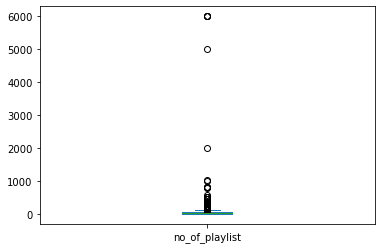

In [21]:
youtube_data.no_of_playlist.plot(kind = 'box')

<AxesSubplot:>

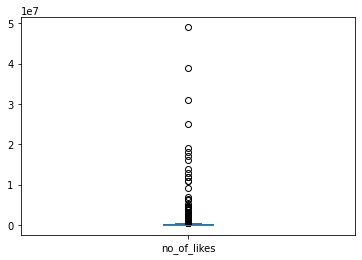

In [22]:
youtube_data.no_of_likes.plot(kind = 'box')

In [23]:
#Replacing with Median values as there are so many outliers
youtube_data['no_of_likes'].fillna(int(youtube_data['no_of_likes'].median()),inplace = True)
youtube_data['no_of_playlist'].fillna(int(youtube_data['no_of_playlist'].median()),inplace = True)

<AxesSubplot:ylabel='creator_gender'>

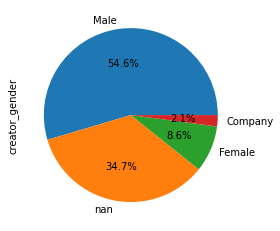

In [24]:
youtube_data.creator_gender.value_counts(dropna = False).plot(kind = 'pie',autopct='%1.1f%%')

Almost 35 % values in creator_gender column are missing. Lets inspect them and find what happned and see if we can replace it with a suitable gender or leave them without any change as substituing with the mode Male skews the data heavily.

In [27]:
youtube_data[youtube_data.creator_gender == 'Company'].creator_name.unique()

array(['Mr Beast', 'Data Is Wonderful', 'Battlegrounds Mobile',
       'Beyounick', 'Nat Geo Wild', '365 Data Science', 'Motiversity',
       'Athleanx', 'Spinninrecords', 'Be Inspired Channel',
       'Business Insider', 'The Prime Thanatos', 'Dude Perfect',
       'All Chill Nation', 'Cartooning Club How to Draw',
       'Drawing 4 Kids How to Draw', 'Clash Of Clans',
       'Applied AI Course'], dtype=object)

In [28]:
youtube_data[youtube_data.creator_gender.isnull()].creator_name.unique()[:25]

array(['TRT', 'Vogue', 'PUBG: BATTLEGROUNDS', 'Wildgamersk',
       'Codename RedDragon', 'Prime', '100 Years Of Health', 'CNET',
       'Videotragic', 'Pokémon Asia Officia', 'Other Level\x92S',
       'Disney', 'McLaren Automotive', 'touropia', 'GP Culture', 'IGN',
       'Branch Education', 'Simplilearn', 'Medcircle', 'DJI', 'WIRED',
       'Armadas', 'Motivation Mentors', 'CNBC Make I',
       'Official Triumph Motorcycles'], dtype=object)

We can see that these channels are hosted by News Channels,Educational Institutes, Sports, Music, Film etc Industries. That means they are not individuals. So we will assign the gender Company to these null values in creator_gender column.

In [29]:
youtube_data.loc[youtube_data.creator_gender.isnull(),'creator_gender'] = 'Company'

In [30]:
youtube_data.loc[youtube_data.creator_gender.isnull(),'creator_gender'] = 'Company'

In [31]:
youtube_data.subtitle.value_counts(dropna = False)

Yes    460
No     380
yes     64
NaN      1
Name: subtitle, dtype: int64

The subtitle column has 2 different yes due to formating mistakes. Let's change the different yes to a single format and fill the NaN values with mode.

In [32]:
youtube_data['subtitle'] = youtube_data['subtitle'].map({'Yes':'yes','No':'no','yes':'yes'})

In [33]:
#Replacing NaN with mode of the Categorical Variable
youtube_data['subtitle'].fillna(youtube_data['subtitle'].mode()[0],inplace = True) 
youtube_data.date_of_the_last_comment.fillna(youtube_data.date_of_the_last_comment.mode()[0],inplace = True)

<AxesSubplot:>

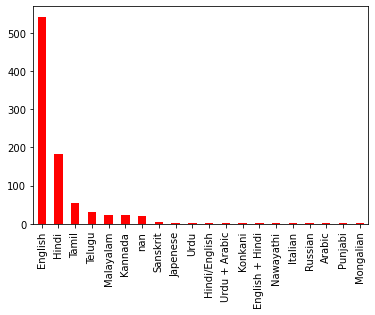

In [34]:
youtube_data.language_of_the_video.value_counts(dropna = False).plot(kind = 'bar', color = 'red')

We will drop the rows with NaN values in language_of_the_video column as the column has many categorical variables and it may skew the data if we assign mode to it. It less than 2.5 percent of the dataset. We may not lose much information with these change.

In [35]:
youtube_data.dropna(subset = ['language_of_the_video','creator_name'], inplace = True)

In [36]:
youtube_data.isna().sum()

video_link                               0
video_views                              0
video_title                              0
channel_url                              0
creator_name                             0
creator_gender                           0
total_channel_subcribers                 0
total_channel_views                      0
duration_of_video                        0
duration_in_seconds                      0
date_of_video_upload                     0
no_of_likes                              0
language_of_the_video                    0
subtitle                                 0
video_description                        0
hashtags                                 0
no_of_comments                           0
date_of_the_last_comment                 0
maximum_quality_of_the_video             0
no_of_videos_the_channel                 0
no_of_playlist                           0
premiered_or_not                         0
community_engagement_(posts_per_week)    0
intern_who_

In [37]:
youtube_data[['duration_of_video','date_of_video_upload','date_of_the_last_comment']].head()

,duration_of_video,date_of_video_upload,date_of_the_last_comment
0,00:30:41,7/29/2022,8/6/2022
1,00:14:24,5/22/2022,6/15/2022
2,0:08:12,2/9/2021,9/23/2022
3,0:01:06,9/13/2022,9/22/2022
4,0:07:40,3/21/2017,9/23/2022


In [47]:
youtube_data['date_of_video_upload'] = pd.to_datetime(youtube_data['date_of_video_upload'])
youtube_data['date_of_the_last_comment'] = pd.to_datetime(youtube_data['date_of_video_upload'])

In [48]:
youtube_data['duration_of_video'] = pd.to_datetime(youtube_data['duration_of_video'])
youtube_data['duration_of_video'] = youtube_data['duration_of_video'].apply(lambda x:x.time())

In [49]:
youtube_data[['duration_of_video','duration_in_seconds','date_of_video_upload','date_of_the_last_comment']].dtypes

duration_of_video                   object
duration_in_seconds                  int32
date_of_video_upload        datetime64[ns]
date_of_the_last_comment    datetime64[ns]
dtype: object

In [50]:
youtube_data['duration_in_minutes'] = youtube_data.duration_of_video.apply(lambda x:(round(x.hour * 60 + x.minute + x.second/60)))

In [51]:
youtube_data['upload_year'] = youtube_data['date_of_video_upload'].apply(lambda x:x.strftime('%Y'))
youtube_data['upload_month'] = youtube_data['date_of_video_upload'].apply(lambda x:x.strftime('%B'))
youtube_data['upload_weekday'] = youtube_data['date_of_video_upload'].apply(lambda x:x.strftime('%A'))

In [52]:
youtube_data.head().iloc[:,-4:]

,duration_in_minutes,upload_year,upload_month,upload_weekday
0,31,2022,July,Friday
1,14,2022,May,Sunday
2,8,2021,February,Tuesday
3,1,2022,September,Tuesday
4,8,2017,March,Tuesday


(0.0, 100.0)

<Figure size 1440x576 with 0 Axes>

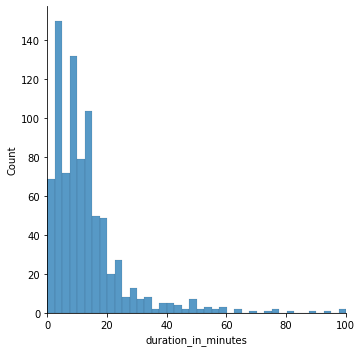

In [53]:
plt.figure(figsize = (20,8))
sns.displot(x = 'duration_in_minutes', data = youtube_data)
plt.xlim(0,100)

In [54]:
youtube_data.duration_in_minutes.describe()

count     873.000000
mean       33.026346
std       108.429142
min         0.000000
25%         5.000000
50%        11.000000
75%        17.000000
max      1045.000000
Name: duration_in_minutes, dtype: float64

We will segment the duration_in_minutes column into different categories of video based on time length. We will categorize video less than 2 minute, 10 minutes, 30 minutes, 60 minutes and greater than 60 minutes as Supershort, Short, Medium,Long and SuperLong categories

In [56]:
youtube_data['length_category'] = pd.cut(youtube_data.duration_in_minutes, bins = [-1,2,10,30,60,1100], labels = ['Supershort', 'Short', 'Medium','Long','SuperLong'])

In [58]:
youtube_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 0 to 904
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   video_link                             873 non-null    object        
 1   video_views                            873 non-null    int64         
 2   video_title                            873 non-null    object        
 3   channel_url                            873 non-null    object        
 4   creator_name                           873 non-null    object        
 5   creator_gender                         873 non-null    object        
 6   total_channel_subcribers               873 non-null    int32         
 7   total_channel_views                    873 non-null    int32         
 8   duration_of_video                      873 non-null    object        
 9   duration_in_seconds                    873 non-null    int32     

In [59]:
youtube_data.to_csv('youtube_cleaned.csv', index = False)

# Exploratory Data Analysis

In [60]:
plt.style.use('seaborn-poster')
sns.set_style('white')

### Top 10 channels subscriber wise

In [61]:
top10_channelsub = youtube_data[['creator_name','total_channel_subcribers', 'creator_gender']].groupby('creator_name').max().\
                        sort_values(by = 'total_channel_subcribers',ascending = False).head(10)
top10_channelsub.reset_index(drop = False, inplace = True)

In [62]:
gender_palette = {'Male': 'Blue', 'Female': 'Magenta', 'Company': 'Orange'}

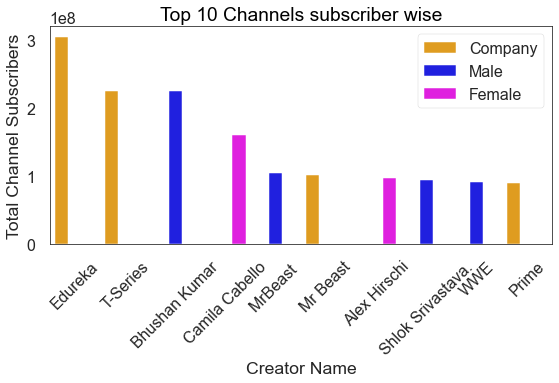

In [63]:
plt.figure(figsize = (9,4))
sns.barplot(x = 'creator_name',y = 'total_channel_subcribers', hue = 'creator_gender', palette = gender_palette, data = top10_channelsub )
plt.xticks(rotation = 45)
plt.title('Top 10 Channels subscriber wise', color = 'black')
plt.xlabel('Creator Name')
plt.ylabel('Total Channel Subscribers')
plt.legend(loc = 1)
plt.show()

As per the dataset, we can see that more than half of the top 10 channels are by individuals not comapanies. Males and Companies have equal number of channels in the top and double that of female.

### Top 10 channels views wise

In [64]:
top_channelsview = youtube_data[['creator_name','total_channel_views', 'creator_gender']].groupby('creator_name').max()\
                                    .sort_values(by = 'total_channel_views', ascending = False).head(10)
top_channelsview.reset_index(drop = False, inplace = True)

C:\Users\sneha\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sneha\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


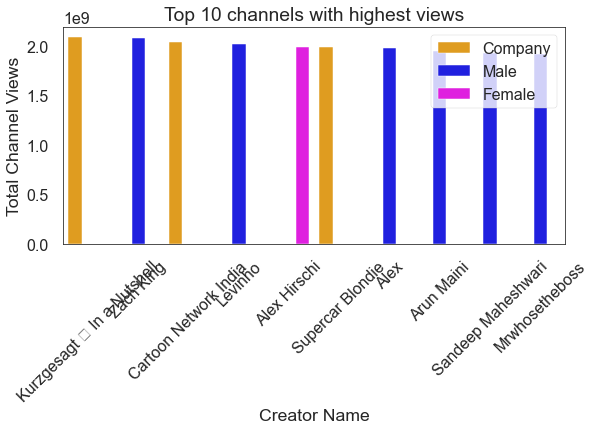

In [65]:
top_channelsview = youtube_data[['creator_name','total_channel_views', 'creator_gender']].groupby('creator_name').max()\
                                    .sort_values(by = 'total_channel_views', ascending = False).head(10)
top_channelsview.reset_index(drop = False, inplace = True)
plt.figure(figsize = (9,4))
sns.barplot(x = 'creator_name', y = 'total_channel_views', hue = 'creator_gender', data = top_channelsview, 
            palette = gender_palette )
plt.title('Top 10 channels with highest views')
plt.ylabel('Total Channel Views')
plt.xlabel('Creator Name')
plt.xticks(rotation = 45)
plt.legend(loc = 1)
plt.show()

We observe that most of the channels belong to music industry. It seems music channels get the highest number of views of all categories.

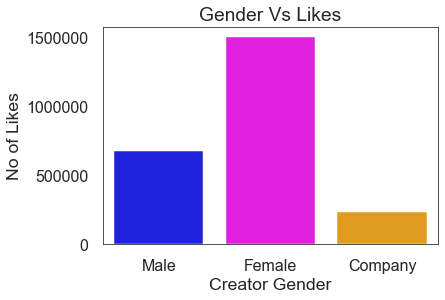

In [67]:
plt.figure(figsize=(6,4))
sns.barplot(x="creator_gender", y="no_of_likes", palette = gender_palette, data=youtube_data, ci = None)
plt.xlabel("Creator Gender")
plt.ylabel("No of Likes")
plt.title('Gender Vs Likes')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

The videos made by Female gender are garning more likes than Males and Company by a huge margin.

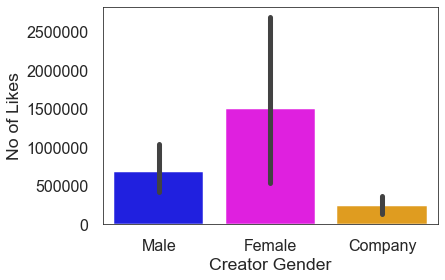

In [68]:
plt.figure(figsize=(6,4))
sns.barplot(x="creator_gender", y="no_of_likes", palette = gender_palette, data=youtube_data)
plt.xlabel("Creator Gender")
plt.ylabel("No of Likes")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

No handles with labels found to put in legend.


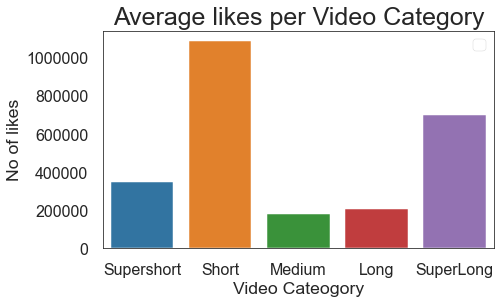

In [69]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'length_category', y = 'no_of_likes', data = youtube_data, ci = None )
plt.title('Average likes per Video Category', fontsize = 25)
plt.xlabel('Video Cateogory' )
plt.ylabel('No of likes')
plt.ticklabel_format(axis = 'y',style = 'plain' )
plt.legend()

Videos of short duration between 2 to 10 minutes are getting most likes on average followed by SuperLong videos of more than a hour long.

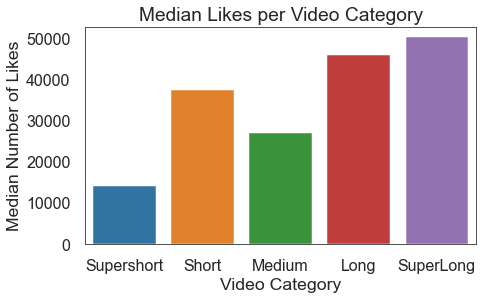

In [70]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'length_category', y = 'no_of_likes', data = youtube_data, estimator = np.median, ci = None)
plt.title('Median Likes per Video Category')
plt.xlabel('Video Category')
plt.ylabel('Median Number of Likes')
plt.show()

In [72]:
youtube_data.maximum_quality_of_the_video.unique()

array(['1080p', '720p', '2160p', '240p', '1440p', '480p', '360p'],
      dtype=object)

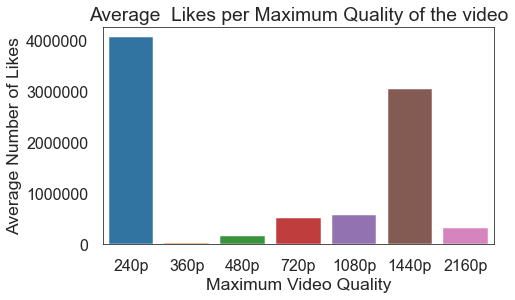

In [73]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'maximum_quality_of_the_video', y = 'no_of_likes', order =['240p','360p','480p','720p','1080p', '1440p','2160p' ],
            data = youtube_data, ci = None)
plt.title('Average  Likes per Maximum Quality of the video')
plt.xlabel('Maximum Video Quality')
plt.ylabel('Average Number of Likes')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show()

The videos of 240p quality are getting most likes on average but there are 3 videos of 240p quality which are so famous and skewing the result. But the general trend is people are liking the videos of highest quality.

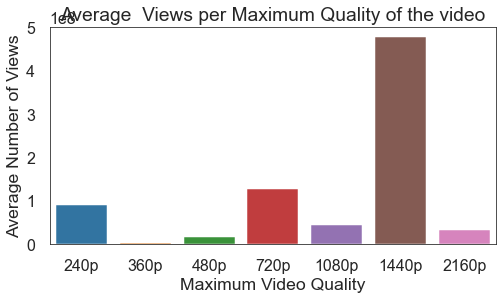

In [74]:
plt.figure(figsize = (8,4))
sns.barplot(x = 'maximum_quality_of_the_video', y = 'video_views', order =['240p','360p','480p','720p','1080p', '1440p','2160p' ],
            data = youtube_data, ci = None)
plt.title('Average  Views per Maximum Quality of the video')
plt.xlabel('Maximum Video Quality')
plt.ylabel('Average Number of Views')
plt.show()

The videos of 1440p quality are getting more views on average followed by 720p quality

In [76]:
year_order = np.sort(youtube_data.upload_year.unique())

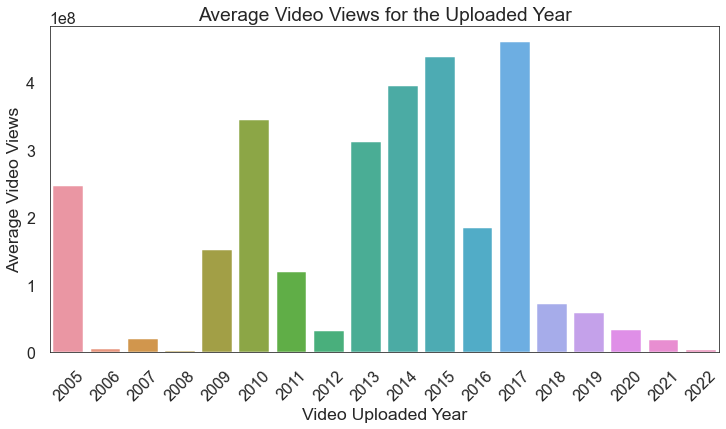

In [77]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'upload_year',y = 'video_views', data = youtube_data, order = year_order, ci = None)
plt.title('Average Video Views for the Uploaded Year')
plt.xlabel('Video Uploaded Year')
plt.ylabel('Average Video Views')
plt.xticks(rotation = 45)
plt.show()

Contrary to my expectation of average video views increasing every year, it fell down from last 5 years. Videos uploaded in 2017,2015,2014,2013 got more views on average compared to all years.

In [78]:
month_order = ['January','February','March','April', 'May', 'June','July', 'August','September','October', 
               'November', 'December']

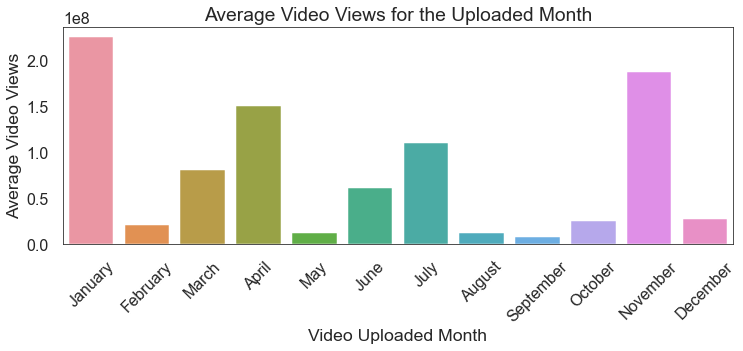

In [79]:
plt.figure(figsize = (12,4))
sns.barplot(x = 'upload_month',y = 'video_views', data = youtube_data,order = month_order, ci = None)
plt.title('Average Video Views for the Uploaded Month')
plt.xlabel('Video Uploaded Month')
plt.ylabel('Average Video Views')
plt.xticks(rotation = 45)
plt.show()

Videos uploaded in months of January and November got the highest views on average.

In [80]:
weekday_order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']

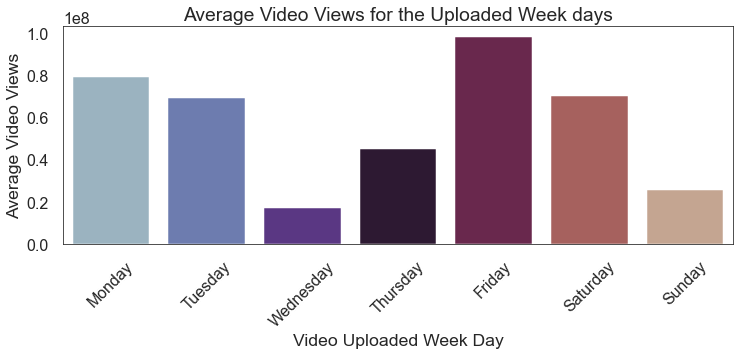

In [81]:
plt.figure(figsize = (12,4))
sns.barplot(x = 'upload_weekday',y = 'video_views', data = youtube_data,order = weekday_order, palette = 'twilight', ci = None)
plt.title('Average Video Views for the Uploaded Week days')
plt.xlabel('Video Uploaded Week Day')
plt.ylabel('Average Video Views')
plt.xticks(rotation = 45)
plt.show()

Videos uploaded on Fridays are getting the most views on average and those uploaded on Wednesday are getting the least.